In [18]:
# 1.导入需要的库和模块
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

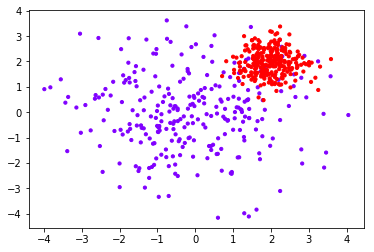

In [19]:
# 2.创建样本不均衡的数据集
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=550, centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) #其中红色点是少数类，紫色点是多数类

In [20]:
# 3.在数据集上分别建模
#不设定class_weight
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

#设定class_weight
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

#给两个模型分别打分,这个分数是accuracy准确度
print(clf.score(X,y))
print(wclf.score(X,y))

0.9345454545454546
0.9145454545454546


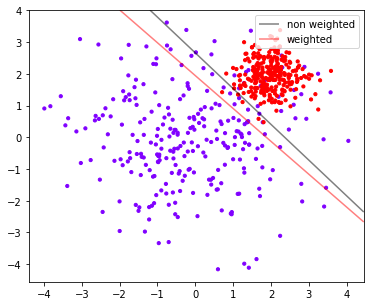

In [21]:
# 4.绘制两个模型下数据的决策边界
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])
#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

In [23]:
# 5.准确率

#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
print((y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum())
      
#对于有class_weight，做了样本平衡的红色决策边界来说：
print((y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum())

0.8970099667774086
0.8540372670807453


In [24]:
# 6.精确度

#所有predict为1的点 / 全部为1的点的比例
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
print((y[y == clf.predict(X)] == 1).sum()/(y == 1).sum())

#对于有class_weight，做了样本平衡的红色决策边界来说：
print((y[y == wclf.predict(X)] == 1).sum()/(y == 1).sum())

0.9818181818181818
1.0


In [25]:
#7.特异度

#所有被正确预测为0的样本 / 所有的0样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
print((y[y == clf.predict(X)] == 0).sum()/(y == 0).sum())

#对于有class_weight，做了样本平衡的红色决策边界来说：
print((y[y == wclf.predict(X)] == 0).sum()/(y == 0).sum())

0.8872727272727273
0.8290909090909091
